In [15]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

nm=1e-9
um=1e-6
mm=1e-3
cm=1e-2

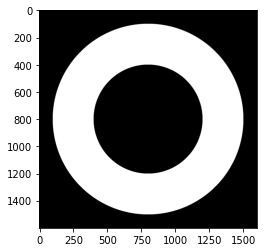

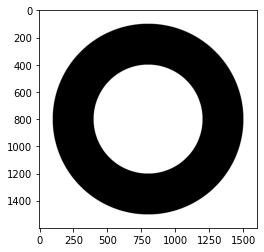

In [59]:
#Apertura circular
%matplotlib inline

radio =400
 
mask=np.zeros((1600,1600),dtype="uint8")
cv2.circle(mask,(800,800),700,1,-1)   #Radio de la apertura o es de 7000 um
cv2.circle(mask,(800,800),radio,0,-1)  #Radio del obstaculo es de 31200 um
plt.imshow(mask,cmap="gray")
plt.show()

mask2=np.ones((1600,1600),dtype="uint8")
cv2.circle(mask2,(800,800),700,0,-1)   #Radio de la apertura o es de 700 um
cv2.circle(mask2,(800,800),radio,1,-1)  #Radio del obstaculo es de 312 um
plt.imshow(mask2,cmap="gray")
plt.show()



In [ ]:
#Transformada de Fresnel FFT
def TrFr(entrada,z,dx,dy,W_l):
    #Contenido frecuencial de la imagen (transformada de fourier)
    k= 2*np.pi/W_l
    N,M= np.shape(entrada)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)
    X0, Y0=np.meshgrid(x,y)

    #concidion de buen muestreo
    dx_0=(W_l*z)/(M*dx)
    dy_0=(W_l*z)/(N*dy)

    fx=X0*(1/(N*dx_0))
    fy=Y0*(1/(M*dy_0))
    
    #Constante de U_0
    C1= (1j*(k/(2*z)))
    U_1 = entrada*np.exp(C1*(((X*dx)**2) + ((Y*dy)**2)))
    U_2 = np.fft.fft2(U_1)

    #Constantes de U_2
    C2= ((np.exp(1j*k*z))/(1j*W_l*z))
    C3= 1j*(k/(2*z))

    U_3= U_2*C2*np.exp(C3*(((fx)**2) + ((fy)**2)))
    
    return U_3
    
plt.imshow(np.abs(np.fft.fftshift((TrFr(mask,0.1,1*um,1*um,632.8*nm))))**2,cmap="gray")
plt.show()
    

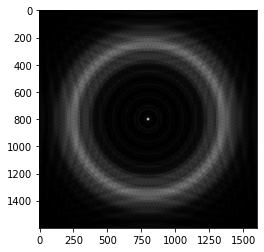

In [67]:
#Tranferencia de Fresnel

def T_Aprox(T_f,z,dx,dy,wavelength):
    #Contenido frecuencial de la imagen (transformada de fourier)
    T_freq=np.fft.fftshift(np.fft.fft2(T_f))
    #Se define el espacio de coordenadas según la imagen que hace de U_0
    N,M= np.shape(T_f)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)

    #dimensiones de mundo en frecuencias
    fx=X*(1/(N*dx))
    fy=Y*(1/(M*dy))

    #vector de onda Y constantes de e^{ikz} .....
    k= 2*np.pi/wavelength
    C1=np.exp(1j*k*z)
    C2=-1j*np.pi*wavelength*z

    #Tranformada H(f_x,f_y)
    Tran=C1*np.exp(C2*((fx**2)+(fy**2)))

    #U(x,y,z)
    U_resultante=Tran*T_freq

    return U_resultante

plt.imshow(np.abs(np.fft.ifft2((T_Aprox(mask,1,5*um,5*um,633*nm))))**2,cmap="gray")
plt.show()
    


In [13]:
# ESPECTRO ANGULAR POR FFT
def AngFT(entrada,z,dx,dy,wavelength):
    k=2*np.pi/wavelength
    U_0=entrada
    A_0=np.fft.fftshift(np.fft.fft2(U_0))
    N,M= np.shape(U_0)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)

    #dimensiones de mundo en frecuencias
    fx=X*(1/(N*dx))
    fy=Y*(1/(M*dy))

    #transferencia
    H=np.exp(1j*k*z* np.emath.sqrt( 1 - (wavelength**2)*(fx**2+fy**2)  ))
    A_z=A_0*H
    U_z=np.fft.ifft2(A_z)
        
    return U_z


In [80]:
def NumZ(W_l,z,r):    
    R = ((r**2))/W_l*z
    return R     
def Radio(W_l,z,n):    
    R = np.sqrt((n*z*W_l))
    return R 
def separación(W_l,r,n):    
    R = ((r**2))/W_l*n
    return R 
print("Z para n zonas de fresnel:",separación(633*nm, radio*um,1))
print("Radio obstaculo:",Radio(633*nm,0.020,9000))
print("Radio obstaculo:",NumZ(633*nm,0.020,))


print("Z limite:",(np.shape(mask)[0]*(10*um**2))/(633*nm))

Z para n zonas de fresnel: 0.2527646129541864
Radio obstaculo: 0.010674268124794318


TypeError: NumZ() missing 1 required positional argument: 'r'

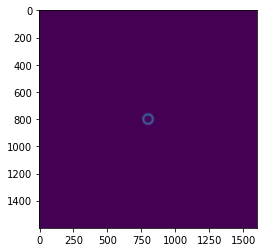

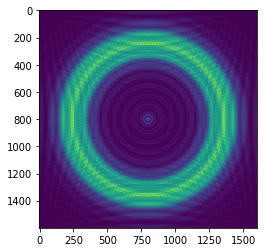

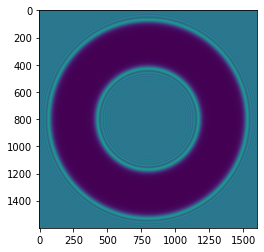

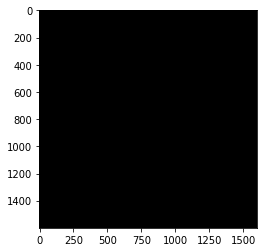

In [82]:
plt.imshow(np.abs(np.fft.fftshift((TrFr(mask,1,5*um,5*um,633*nm))))**2)
plt.show()

plt.imshow(np.abs(((AngFT(mask,0.8,5*um,5*um,633*nm))))**2)
plt.show()

plt.imshow(np.abs(((AngFT(mask2,0.0020,1*um,1*um,650*nm))))**2)
plt.show()


plt.imshow(np.abs((AngFT(mask,0.0020,1*um,1*um,650*nm)-AngFT(mask,0.0020,1*um,1*um,650*nm)))**2,cmap="gray")
plt.show()

